# MDI220: Statistics

# Project

Bruno Pons

## Import

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import gamma
from scipy.stats import norm
%matplotlib ipympl
import matplotlib.pyplot as plt
import math

import statsmodels.api as sm
import pylab

## Data

Datasets on the cost of nuclear accidents before the accident of Three Mile Island that
occurred on March 28, 1979. Cost is represented in million of 2013US$.

# Exercice 1

## 1-

In [2]:
df = pd.read_csv('C_id_35_NuclearPowerAccidents2016.csv', usecols=['Date', 'Cost (millions 2013US$)'] ,low_memory=False)
df = df.rename(columns={'Cost (millions 2013US$)': 'Cost'})
df = df.dropna()
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)
df.sort_values(by='Date', inplace=True)
df = df.set_index('Date')
df_1979 = df['1946-05-21':'1979-02-04']
df = df_1979
costs = pd.array(df['Cost'])

## 2- Gaussian distribution

## a) 

Because the cumulative distribution function is strictly monotonically increasing, the quantil function is equal to the inverse of the CDF. So we proced to make the inverse of the CDF:

$F_\theta(x) = \frac{1}{2}[1+erf(\frac{x-\mu}{ \sqrt{2} \sigma})]  \rightarrow  $ where $ erf(x)= \frac{2}{\pi} \int_{0}^{x} e^{-t^2} dt  $


$\forall p \in (0,1)$

$  p= \frac{1}{2}[1+erf(\frac{x-\mu}{ \sqrt{2} \sigma})] \rightarrow {erf}^{-1}((2p-1)=\frac{x-\mu}{\sqrt{2} \sigma}  \rightarrow   x = \mu + \sqrt{2}.\sigma.{erf}^{-1}((2p-1)  \Rightarrow  F_\theta^{-1}(p)= \mu + \sqrt{2}.\sigma.{erf}^{-1}(2p-1)    $

Then:

$     F_{(0,1)}^{-1}(p)= \sqrt{2}.{erf}^{-1}(2p-1) \Rightarrow   F_\theta^{-1}(p)= \sigma.F_{(0,1)}^{-1}(p) + \mu  $

## b)

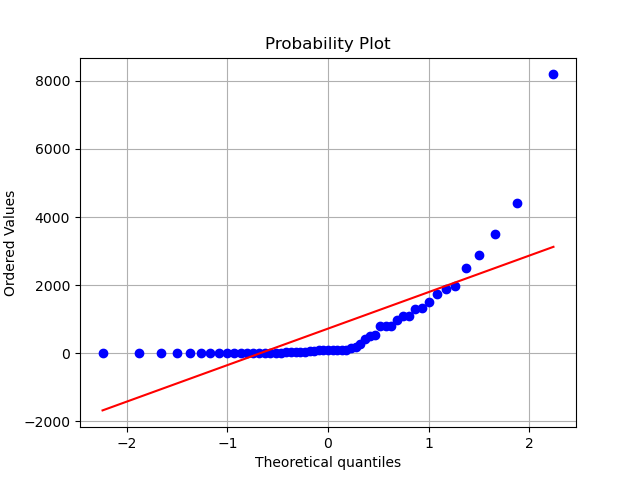

Square root of the coefficient of determination, "r" =  0.7438969625276352


In [3]:
fig, ax = plt.subplots()
out = stats.probplot(costs, dist='norm', fit=True, plot=plt, rvalue=False)
plt.grid()
plt.show()

print('Square root of the coefficient of determination, "r" = ', out[1][2])

## 3- Exponential distribution

## a)

Because the cumulative distribution function is strictly monotonically increasing, the quantil function is equal to the inverse of the CDF. So we proced to make the inverse of the CDF:

$F_\theta(x) = 1 - e^{-\theta x}  $

$\forall p \in (0,1)$

$ p= 1 - e^{-\theta x} \rightarrow -\theta x = ln(1-p) \rightarrow x=\frac{-ln(1-p)}{\theta} \Rightarrow F_\theta^{-1}(p) = \frac{-ln(1-p)}{\theta} $

Then:

$ F_1^{-1}(p) = -ln(1-p) \Rightarrow F_\theta^{-1}(p)=\frac{1}{\theta}F_1^{-1}(p) $


## b)

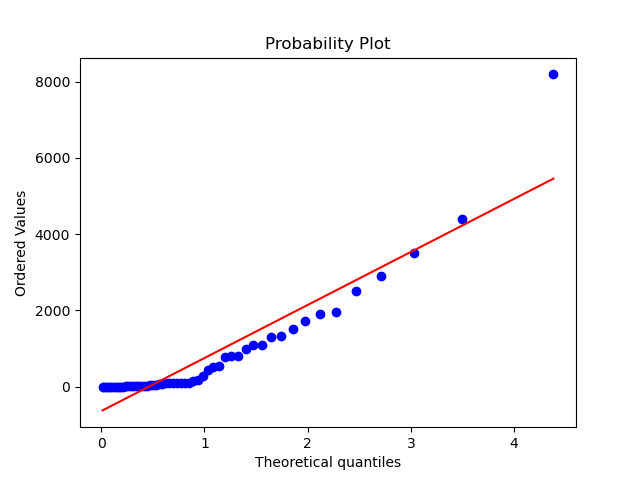

Square root of the coefficient of determination, "r" =  0.9305092443126555


In [4]:

fig, ax = plt.subplots()
out = stats.probplot(costs, dist='expon', fit=True, plot=plt, rvalue=False)
plt.show()

print('Square root of the coefficient of determination, "r" = ', out[1][2])

## 4-

From the previous Q-Q plots we can observe that, if we plot with a Gaussian model the data doesn't adjust very well to the thereotical model, on the other hand if we plot with an exponential model the data is adjusted better to this model. We can also obtain from $stats.probplot$ the coefficient of determination, that provides a measure of how well observed outcomes are replicated by the model, so we can reaffirm that efectively the exponential model adjust better the data.

# Exercise 2 (Point estimation):

## 1. Give the maximum likelihood estimator $\hat{\theta}$ of $\theta$.

The pdf of the exponential model is $p_\theta (x_i) = \theta e^{-\theta x_i}$.

Then, $p_\theta(X)= \prod_{i=1}^{n} \theta e^{-\theta x_i} = \theta^n exp (-\theta \sum_{i=1}^{n}x_i)= \theta^n exp (-\theta S)$ with $S = \sum_{i=1}^{n}x_i$.

Taking the log,
$ln (p_\theta(X)) = nlog(\theta) - \theta S$.

Deriving with respect to $\theta$ we will get,

$\frac{\partial L(\theta)}{\partial \theta} = \frac{n}{\theta} - S = 0 \Rightarrow \hat{\theta} = \frac{1}{\bar{x}}$ with $\bar{x} = \frac{1}{n} \sum_{i=1}^{n}x_i$.

In [5]:
tita_tilde = 1/np.mean(costs)
print('Theta estimator =', tita_tilde)

Theta estimator = 0.0013767725947156962


## 2. Show on the same plot the histogram of data in density and the probability density function of the exponential distribution with parameter $\hat{\theta}(X)$.

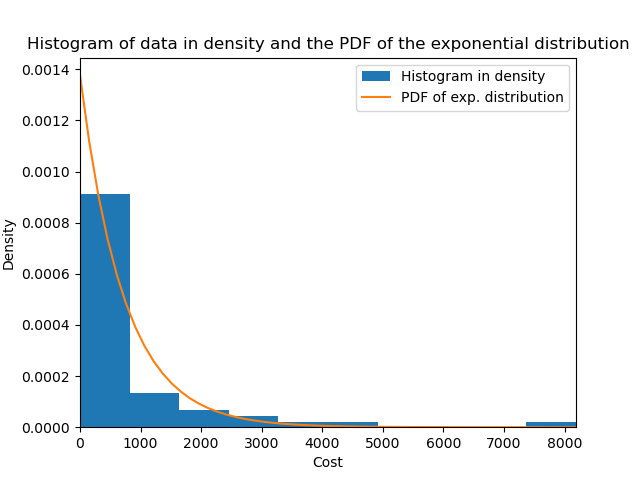

In [6]:
counts, bins = np.histogram(costs)
x = np.linspace(0, np.max(costs), costs.shape[0])
func_exp=tita_tilde*np.e**(-tita_tilde*x)


fig, ax = plt.subplots()
plt.hist(bins[:-1], bins, weights=counts,density=True, label="Histogram in density")
ax.plot(x,func_exp, label="PDF of exp. distribution" )
plt.xlim(x[0], x[-1])
plt.title('Histogram of data in density and the PDF of the exponential distribution')
plt.ylabel("Density")
plt.xlabel('Cost')
ax.legend(loc="upper right")

plt.show()

## 3. We seek to estimate the expected cost $g(\theta)=\frac{1}{\theta}$. Let $\hat{g}(x)=\frac{1}{n}\sum_{i=1}^{n}x_i$. Show that $\hat{g}$ is an efficient estimator of $g(\theta)$.

For the expected value:

$E_\theta (\hat{g}(x)) = E_\theta(\frac{1}{n}\sum_{i=1}^{n}x_i) = \frac{1}{n}\sum_{i=1}^{n}E_\theta(x_i)$

We know that the expectation of an exponential distribution is $E_\theta(x_i)=\frac{1}{\theta}$. Then, $E_\theta (\hat{g}(x)) = \frac{1}{\theta}$, and $\hat{g}$ is an unbiased estimator.

For the variance:

$Var(\hat{g}(x))=\frac{1}{n^2}\sum_{i=1}^{n}Var(x_i)$

We know the variance of the exp. distribution is $Var(x_i)=\frac{1}{\theta^2}$ we get:
$Var(\hat{g}(x))=\frac{1}{n \theta^2}$

Therefore the quadratic risk, $R(g(\theta), \hat{g}(x)) = Var(\hat{g}(x))=\frac{1}{n \theta^2}$.

For n variables iid it holds $I_n(\theta)=nI_1(\theta)$.

$I_1 = Var (\frac{\partial log p_{g(\theta)} (x)}{\partial g(\theta)}) = Var (\frac{\partial (log (g(\theta)) - g(\theta) x)}{\partial g(\theta)}) = Var (1/g(\theta)-x) = Var (\theta - x) = Var(x) = 1/g(\theta)^2=\theta^2 \rightarrow I_n(\theta) = n\theta^2$

Thus, $R(g(\theta), \hat{g}(x)) = \frac{1}{I(\theta)}$ and $\hat{g}(x)$ is an efficient estimator of $g(\theta)$.

## 4. Compute $\hat{g}(X) $ from the available observations.

In [7]:
g_hat = np.mean(costs)
print("The value computed is =", g_hat)

The value computed is = 726.3363636363638


## 5. For any η > 0, define the estimator $\hat{g}_η =η \hat{g} $, show that for some values of η (to be specified), the quadratic risks associated with the estimation of g(θ) satisfy $R(\theta, \hat{g}_η ) < R(\theta, \hat{g})$ for all $\theta>0$.

We would like to find some values of $\eta$ such that $R(\theta,\hat{g}_\eta)<R(\theta,\hat{g})$.

For the new estimator $\hat{g}_\eta = \eta g$, we can notice that it is biased as shown below:

$b(\theta, \hat{g}_\eta ) = E(\hat{g}_\eta(X)) - g(\theta) = \eta E(\hat{g}(X)) - g(\theta)$, we know that $E(\hat{g}(X))=1/\theta$.

Thus, $b(\theta, \hat{g}_\eta ) = \frac{1}{\theta} (\eta -1)$

Besides, $Var(\hat{g}_\eta(X)) = \eta^2 Var(\hat{g}(X))$, we know that $Var(\hat{g}(x)) = \frac{1}{n \theta ^2}$

Therefore, $Var(\hat{g}_\eta(X)) = \eta^2 \frac{1}{n \theta ^2}$

In this way, we have the risk of the new estimator $\hat{g}_\eta$ as:

$R(\theta, \hat{g}_\eta) = \frac{1}{\theta^2}[(\eta-1)^2+\frac{\eta^2}{n}]$

We will develop the inequality, remember that $R(\theta, \hat{g}(\theta)) = \frac{1}{n\theta^2}$, so we have:

$(\eta-1)(\eta - \frac{n-1}{n+1})<0$

Thus, we have only two possibilities in order to hold the last inequality:

$(I) \left\{\begin{matrix}
 \eta -1 < 0 & \\ 
 \eta -\frac{n-1}{n+1} >0 &
\end{matrix}\right.$ 
$(II) \left\{\begin{matrix}
 \eta -1 > 0 \\ 
 \eta -\frac{n-1}{n+1} <0
\end{matrix}\right.$

For the case number $(II)$ there is no possible solution in $\eta \in \mathbb{R}$ for this system. 

However, we can solve system $(I)$ for $\eta$ such that $\frac{n-1}{n+1}<\eta<1$ which means that the inequality  holds for such values.

## 6. Give η so that $\hat{g}_η$ is an unbiased estimator of the median cost. Compute $\hat{g}_η(x)$ from the available observations. Compare with the empirical median.

Given that the median cost of the exponential distribution is $m = \frac{ln 2}{\theta}$.

We want to find $\eta$ such that $\hat{g}_\eta$ is an unbiased estimator of the median cost. 

$b(m, \hat{g}_\eta (X)) = E(\hat{g}_\eta(X)) - m = \eta E(\hat{g}(X)) - \frac{ln 2}{\theta}$

$b(m, \hat{g}_\eta (X)) = \frac{1}{\theta}(\eta-ln2) = 0 \Rightarrow \eta = ln2$

In [8]:
g_hat_n = np.log(2)*g_hat
print('Estimated median =', g_hat_n)
print('Empirical median =', np.median(costs))

Estimated median = 503.45800259270874
Empirical median = 89.9


## 7. For the previous value of η, compare the quadratic risks of $\hat{g}$ and $\hat{g}_η$ , both viewed as estimators of g(θ), depending on the number of samples n.

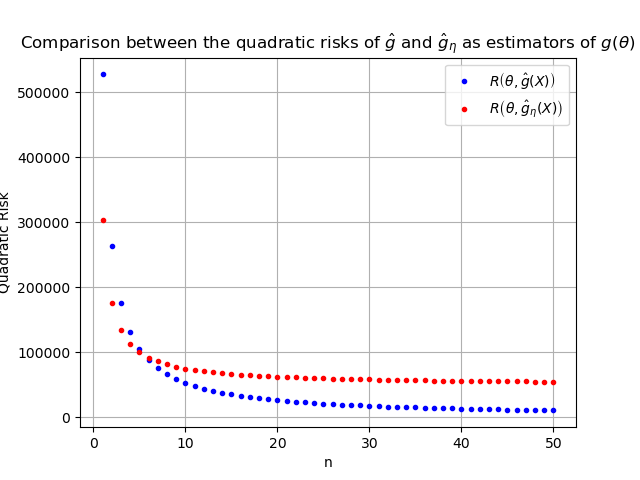

In [9]:
n = np.linspace(1, 50, 50)
eta = np.log(2)

Rhatg = 1/(n*(tita_tilde**2))
Rhatg_eta = (1/tita_tilde**2)*((eta-1)**2 + (eta**2/n))

fig, ax = plt.subplots()
plt.plot(n, Rhatg, '.', color="b")
plt.plot(n, Rhatg_eta, '.', color="red")
plt.title('Comparison between the quadratic risks of $\hat{g}$ and $\hat{g}_\eta$ as estimators of $g(\\theta)$')
plt.xlabel("n")
plt.ylabel("Quadratic Risk")
plt.legend([r"$R\left(\theta, \hat{g}\left(X\right)\right)$", r"$R\left(\theta, \hat{g}_\eta\left(X\right)\right)$"])
plt.grid()
plt.show()

Having $\eta = ln(2)$ fixed, we can observe graphicaly what was done in part 2.5 .

The values where $(I)$ is valid are deduced from this inequality $ \frac{n-1}{n+1}<\eta=ln2$ , so $n \geqslant \frac{1+ln2}{1-ln2} \approx 5.52$, this is corroborated in the graphics above.

# Exercise 3

## 1. Give the null hypothesis $H_0$ and the alternative hypothesis $H_1$ as subsets of Θ.

We wish to show that the expected cost of an accident is less that one billion dollars. The null hypothesis $H_0$ that the expected cost of an accident is at least one
billion dollars, knowing that the mean of the exponential is $E(X)=\frac{1}{\theta}$ ,can be seen as:

$H_0 = \{\frac{1}{\theta} \geq 1000\} $

So the alternative hypothesis $H_1$, can be seen as:

$H_1 = \{\frac{1}{\theta} < 1000\} $

That can also be seen as below:

$H_0 = \{\theta \leq 1x10^{-3}\} $

$H_1 = \{\theta > 1x10^{-3}\} $

## 2. Using Neyman-Pearson’s approach, give a uniformly most powerful test at level α.

The Neyman-Pearson's approach consists in controlling the type-I error rate, that means controlling $\alpha = P(\delta(X)=1|H_0)$ , where $\alpha$ is called level of the test.

In our case we are in a type one-tailed test, where we wish to show that the expected cost of an accident is less that one billion dollars, this means rejecting $H_0$ in favor of $H_1$.

$ p_\theta(x) = \prod_{i=1}^{n} \theta . e^{-\theta x} = \theta^n.e^{\theta S}$ with $S=\sum_{i=1}^{n}x_i$

$\forall \theta_1 > \theta_0, \frac{p_{\theta_1}(x)}{p_{\theta_0}(x)}= \frac{\theta_1^n.e^{-\theta_1 S}}{\theta^n.e^{-\theta_0 S}} \propto e^{(\theta_0 - \theta_1)S} $

Provided that the likelihood ratio is monotone decreasing, then the test $\delta(x) = 1\{S<c\} $ is UMP.

$\alpha = sup_{\theta \in \Theta_0} P(\delta(X)=1) \rightarrow \alpha = P_0(S<c) \rightarrow  c=F^{-1}_{Gamma(n,\theta)} (\alpha)  $

Denoting $P_0$ the probability measure under $H_0$, and $S \sim Gamma(n,\theta)$.

## 3. Apply the test at level α = 5%. Give the p-value and conclude.

In [10]:
n=55
theta= 1/1000
alpha = 0.05

p_value = gamma.cdf(x=costs.sum(),a=n,scale=1/theta)
print('p-value obtained=',p_value)

p-value obtained= 0.013717486423264914


The p-value obtained $p-value=1.37\%$ is smaller than $\alpha = 5\% $, so we can say that the null hypothesis is rejected. In other words we can say, the type-I error is smaller than our target $5\%$.

## 4. For n = 55 samples and the parameter θ associated with an expected cost of one billion dollars, plot the probability density function of $\hat{g}(X)$ and show the rejection region of $H_0$ at level α = 5%.



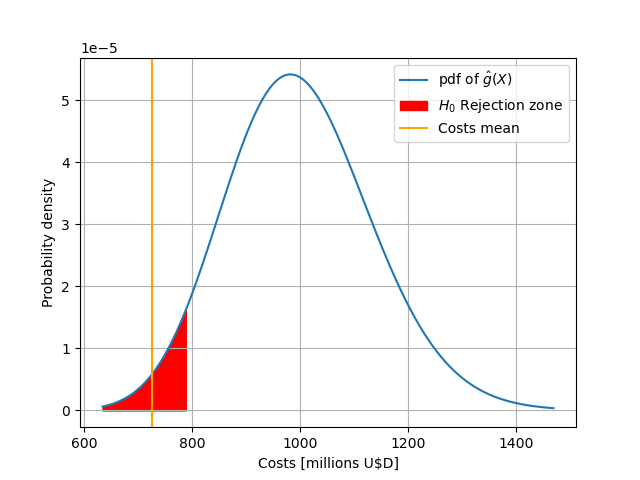

In [11]:

# Calculate c value for rejecting zone
c = gamma.ppf(q=alpha,a=n,scale=1/theta) / n

# Calculate the pdf
begin = gamma.ppf(q=0.001, a=n, scale=1/theta)/n
end = gamma.ppf(q=0.999, a=n, scale=1/theta)/n
index = np.arange(begin, end)
pdf_gamma=gamma.pdf(x=np.arange(begin*n,end*n,n),a=n,scale=1/theta)


# Obtains the rejecting zone
index_not = index[index <= c]
pdf_not = pdf_gamma[:len(index_not)]


# Plot figure
fig, ax = plt.subplots()
ax.plot(index,pdf_gamma, label="pdf of $\hat{g}(X)$")
ax.fill_between(index_not, 0, pdf_not, color="red", label="$H_0$ Rejection zone")
plt.axvline(costs.mean(),color='orange',label="Costs mean")
ax.legend(loc="upper right")
plt.xlabel("Costs [millions U$D]")
plt.ylabel("Probability density")
plt.grid()
plt.show()


## 5. Plot the power of the test at level α with respect to θ for n = 10, 50, 100, 1000 samples. Explain the results.

Similarly as done before, we can write the expresion for the type-II error.

$\beta = P_\theta(S>c)=1-P_\theta(S\leq c) \rightarrow $ power of the test $= 1-\beta = P_\theta(S\leq c) $

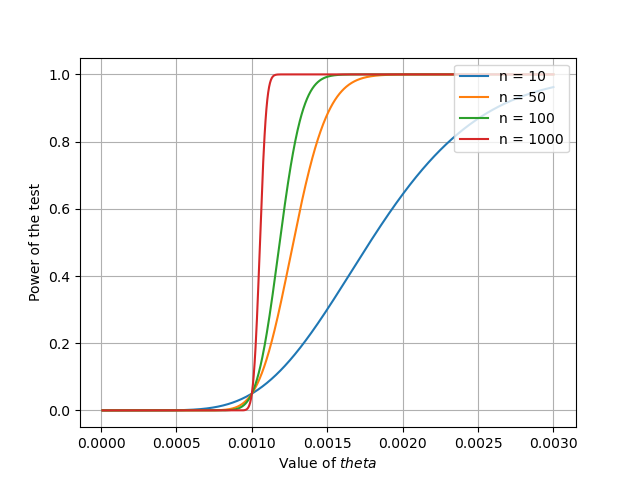

In [12]:
N=[10,50,100,1000]
theta_index = np.linspace(1e-5,3*theta ,1000)
power = np.zeros(len(theta_index))

fig, ax = plt.subplots()
for n in N:
    c = gamma.ppf(q=alpha,a=n,scale=1/theta)
    for i in range(len(theta_index)):
        power[i] = gamma.cdf(x=c, a=n, scale=1/theta_index[i])
    ax.plot(theta_index,power)

ax.legend([f"n = {n}" for n in N],loc="upper right")
plt.xlabel(r"Value of $theta$ ")
plt.ylabel("Power of the test")
plt.grid()
plt.show()

We can observe that increasing the amount of samples can help improve the power of the test. Meaning that the is a better probability that the test can correctly reject the null hypothesis when the alternative hypothesis is true.

## 6. Propose a new test using the approximation of $\hat{g} (X)$ suggested by the Central Limit Theorem and give the result of this test.

By the central Limit Theorem, for a large number of samples "n" we can do the approximation seen below:

$ \hat{g}(X) \rightarrow \frac{\sigma}{\sqrt{n}}.Z + \mu   $

$ \hat{g}(X) \sim N(\mu,\frac{\sigma^2}{n}) $


Where $E[X_1]=\frac{1}{\theta}$, $Var[X_1]=\frac{1}{\theta^2} $, with $ X_1,X_2,... \sim \varepsilon(\theta)$ and $Z \sim N(0,1)$.

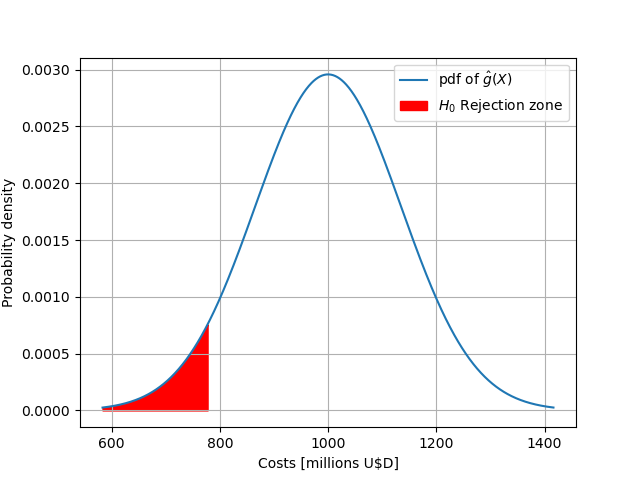

In [13]:
n=len(costs)
theta1=1/theta
std_dev = theta1/np.sqrt(n)


# Calculate c value for rejecting zone
c_n = norm.ppf(q=alpha, loc=theta1 ,scale=std_dev)

# Calculate the pdf
begin_n = norm.ppf(q=0.001, loc=theta1 ,scale=std_dev)
end_n = norm.ppf(q=0.999, loc=theta1 ,scale=std_dev)
index_n = np.arange(begin_n, end_n)
pdf_norm=norm.pdf(x=np.arange(begin_n,end_n,),loc=theta1 ,scale=std_dev)


# Obtains the rejecting zone
index_n_not = index_n[index_n <= c_n]
pdf_n_not = pdf_norm[:len(index_n_not)]





# Plot figure
fig, ax = plt.subplots()
ax.plot(index_n,pdf_norm, label="pdf of $\hat{g}(X)$")
ax.fill_between(index_n_not, 0, pdf_n_not, color="red", label="$H_0$ Rejection zone")
ax.legend(loc="upper right")
plt.xlabel("Costs [millions U$D]")
plt.ylabel("Probability density")
plt.grid()
plt.show()

In [14]:
p_value = norm.cdf(x=costs.sum()/n, loc=theta1 , scale=std_dev)
print('p-value obtained=',p_value)

p-value obtained= 0.021201463906399154


The p-value obtained $p-value=2.12\%$ is smaller than $\alpha = 5\% $, so we can say that the null hypothesis is rejected. In other words we can say, the type-I error is smaller than our target $5\%$.